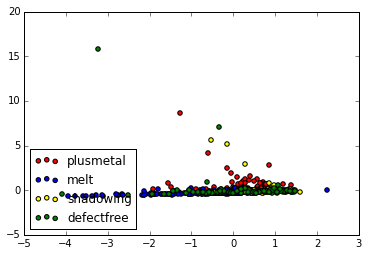

In [1]:
import cv2
from os.path import join
import numpy as np
from os import listdir
from __future__ import division
%matplotlib inline

## Get the Data
categories = []
data = []
for category in listdir("data"):
    temp = []
    for f in listdir(join("data",category)):
        ## Using HEed data
        temp.append(cv2.equalizeHist(cv2.imread(join("data",category,f),cv2.CV_LOAD_IMAGE_GRAYSCALE)))
    data.append(temp)
    categories.append(category)
# Detecting SIFT points for all the images
descriptors = []
descriptors_by_images = []
labels = []
sift = cv2.SIFT(edgeThreshold=2)
for k,c in enumerate(data):
    for img in c:
        kp, des = sift.detectAndCompute(img,None)
        temp = []
        for d in des:
            descriptors.append(d)
            temp.append(d)
        descriptors_by_images.append(temp)
        labels.append(k)
## Calculate the Codebook
from sklearn.cluster import KMeans
n_clusters = 100
km = KMeans(n_clusters=n_clusters)
km.fit(descriptors)

## Represent the image by the Codebook
hist_by_images = []
for desp_set in descriptors_by_images:
    hist = [0 for i in range(n_clusters)]
    for d in desp_set:
        hist[km.predict(d)[0]] += 1
    hist_by_images.append(hist)
# Normalized the histogram for each individual images
normalized_hist_by_images = [np.asarray(h)/sum(h) for h in hist_by_images]
# Calculate the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True)
pca_hist = pca.fit_transform(np.asarray(normalized_hist_by_images))


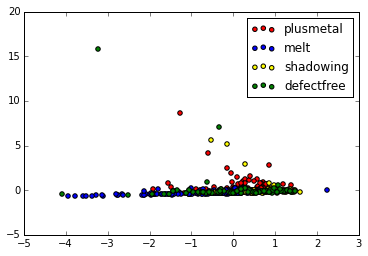

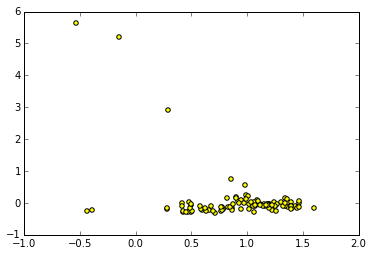

In [7]:
## Plot the Result
import matplotlib.pyplot as plt
color = ["red","blue","yellow","green"]
rlt = []
for k in range(4):
    temp = np.asarray([p for i,p in enumerate(pca_hist) if labels[i]==k])
    X = temp[:,1]
    Y = temp[:,0]
    rlt.append(plt.scatter(X,Y,c=color[k]))
plt.legend(rlt,categories,loc=1)

plt.figure()
temp = np.asarray([p for i,p in enumerate(pca_hist) if labels[i]==2])
X = temp[:,1]
Y = temp[:,0]
plt.scatter(X,Y,c=color[2])

In [3]:
lighting_hist = [[cv2.calcHist(d2,[0],None,[256],[0,256]) for d2 in d] for d in data]

In [15]:
n_clusters = 100
from sklearn.preprocessing import normalize

from __future__ import division

normalized_hist_by_images = [np.asarray(h)/sum(h) for h in hist_by_images]
haha = normalize(np.asarray(hist_by_images).astype(float))

In [99]:
### Checking the Quality of the Clustering
class ClustQuality:
    
    def distance(self,p1,p2):
        p1 = np.asarray(p1)
        p2 = np.asarray(p2)
        return ((p1-p2)**2).sum()
    
    ### Compute Purity of the Clustering
    def purity(self,data,labels,n_cluster):
        km = KMeans(n_clusters=n_cluster)
        classified_clusters = km.fit_predict(data)
        sum_of_majority = 0
        for k in range(n_cluster):
            index = np.where(classified_clusters==k)
            cor_label = np.asarray(labels)[index]
            bin_count = np.bincount(cor_label)
            majority = np.max(bin_count)
            sum_of_majority += majority
        return sum_of_majority/len(labels)
    ### Use the Rand index to evaluate the Quality
    def RI(self,data,labels,n_cluster):
        km = KMeans(n_clusters=n_cluster)
        classified_clusters = km.fit_predict(data)
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        for k_i,obj_i in enumerate(classified_clusters):
            for k_j,obj_j in enumerate(classified_clusters[k_i+1:]):
                
                if(obj_i==obj_j): ## Positive
                    #True
                    if(labels[k_i]==labels[k_i+k_j+1]):
                        TP += 1
                    #False
                    else:
                        FP += 1
                else: ## Negative
                    # True
                    if(labels[k_i]!=labels[k_i+k_j+1]):
                        TN += 1
                    # False
                    else:
                        FN += 1
        return (TP+TN)/(TP+TN+FP+FN)

    def Silhouette(self,data,labels,n_cluster):
        km = KMeans(n_clusters=n_cluster)
        classified_clusters = km.fit_predict(data)
        intra_class = []
        inter_class = []
        for k,pt in enumerate(data):
            target_cluster = classified_clusters[k]
            minimum_inter_class = 99999999999999999
            for cls in range(n_cluster):
                index_cls = np.where(classified_clusters==cls)
                difference = 0
                for d_i in index_cls[0]:
                    pt_compared = data[d_i]
                    difference += self.distance(pt,pt_compared)
                difference = difference / (len(index_cls[0]) - 1)
                
                if(cls==target_cluster):
                    intra_class.append(difference)
                else:
                    if(difference < minimum_inter_class):
                        minimum_inter_class = difference
            inter_class.append(minimum_inter_class)
        
        silhoutte = []
        for k,i in enumerate(intra_class):
            b = inter_class[k]
            a = intra_class[k]
            s_value = (b - a)/max(a,b)
            silhoutte.append(s_value)
        return np.asarray(s_value).mean()

In [100]:
## Evaluate the Effectiveness of the feature from clustering

qual = ClustQuality()

print(qual.purity(pca_hist,labels,4))
print(qual.RI(pca_hist,labels,4))
print(qual.Silhouette(pca_hist,labels,4))

0.534090909091
0.567348053591
0.622610761729


In [62]:
def distance(p1,p2):
    p1 = np.asarray(p1)
    p2 = np.asarray(p2)
    return ((p1-p2)**2).sum()

/home/rr/.local/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


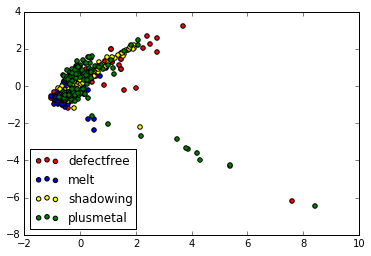

In [1]:
# Plot for the ORB
import cv2
from os.path import join
import numpy as np
from os import listdir
categories = []
data = []
for category in listdir("data"):
    temp = []
    for f in listdir(join("data",category)):
        # Using HEed data
        temp.append(cv2.equalizeHist(cv2.imread(join("data",category,f),cv2.CV_LOAD_IMAGE_GRAYSCALE)))
    data.append(temp)
    categories.append(category)
    
descriptors_orb = []
descriptors_by_images_orb = []
labels = []
orb = cv2.ORB(edgeThreshold=2)

# compute the descriptors with ORB
for k,c in enumerate(data):
    for img in c:
        kp = orb.detect(img,None)
        kp, des = orb.compute(img, kp)
        temp = []
        for d in des:
            descriptors_orb.append(d)
            temp.append(d)
        descriptors_by_images_orb.append(temp)
        labels.append(k)

# Calculate the Codebook 50        
n_clusters = 50
from sklearn.cluster import KMeans
km = KMeans(n_clusters=n_clusters)
km.fit(descriptors_orb)

hist_by_images = []
for desp_set in descriptors_by_images_orb:
    hist = [0 for i in range(n_clusters)]
    for d in desp_set:
        hist[km.predict(d)[0]] += 1
    hist_by_images.append(hist)
    
from __future__ import division
%matplotlib inline
normalized_hist_by_images = [np.asarray(h)/sum(h) for h in hist_by_images]
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True)
pca_hist = pca.fit_transform(np.asarray(normalized_hist_by_images))

import matplotlib.pyplot as plt
color = ["red","blue","yellow","green"]
rlt = []
for k in range(4):
    temp = np.asarray([p for i,p in enumerate(pca_hist) if labels[i]==k])
    X = temp[:,1]
    Y = temp[:,0]
    rlt.append(plt.scatter(X,Y,c=color[k]))
plt.legend(rlt,categories,loc=3)


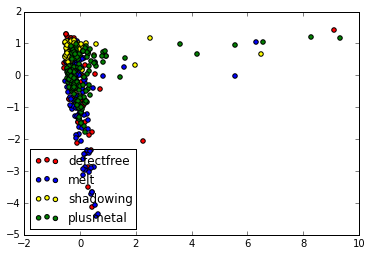

In [19]:
# Plot for the SURF
import cv2
from os.path import join
import numpy as np
from os import listdir
categories = []
data = []
for category in listdir("data"):
    temp = []
    for f in listdir(join("data",category)):
        # Using HEed data
        temp.append(cv2.equalizeHist(cv2.imread(join("data",category,f),cv2.CV_LOAD_IMAGE_GRAYSCALE)))
    data.append(temp)
    categories.append(category)
    
descriptors_surf = []
descriptors_by_images_surf = []
labels = []
surf = cv2.SURF(100)
# compute the descriptors with SURF
for k,c in enumerate(data):
    for img in c:
        kp, des = surf.detectAndCompute(img,None)
        temp = []
        for d in des:
            descriptors_surf.append(d)
            temp.append(d)
        descriptors_by_images_surf.append(temp)
        labels.append(k)

# Calculate the Codebook 50        
n_clusters = 50
from sklearn.cluster import KMeans
km = KMeans(n_clusters=n_clusters)
km.fit(descriptors_surf)

hist_by_images = []
for desp_set in descriptors_by_images_surf:
    hist = [0 for i in range(n_clusters)]
    for d in desp_set:
        hist[km.predict(d)[0]] += 1
    hist_by_images.append(hist)
    
from __future__ import division
%matplotlib inline

normalized_hist_by_images = [np.asarray(h)/sum(h) for h in hist_by_images]

from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True)
pca_hist = pca.fit_transform(np.asarray(normalized_hist_by_images))

import matplotlib.pyplot as plt
color = ["red","blue","yellow","green"]
rlt = []
for k in range(4):
    temp = np.asarray([p for i,p in enumerate(pca_hist) if labels[i]==k])
    X = temp[:,1]
    Y = temp[:,0]
    rlt.append(plt.scatter(X,Y,c=color[k]))
plt.legend(rlt,categories,loc=3)


In [17]:
len(descriptors_surf)

145258

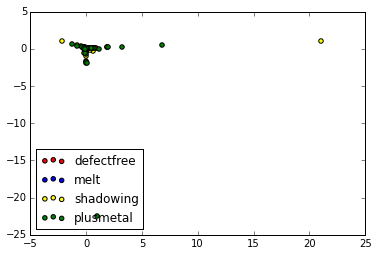

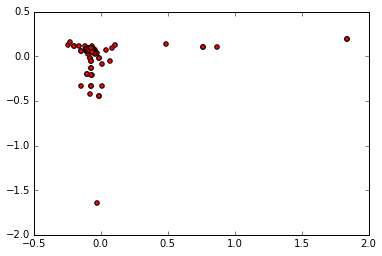

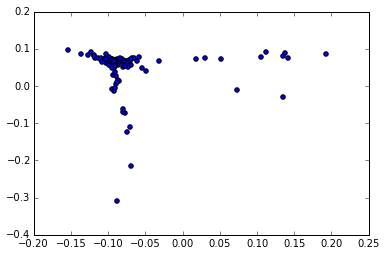

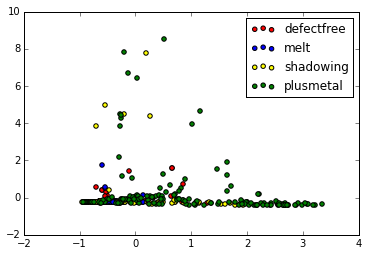

In [61]:
### Evaluate the Histogram
import cv2
from os.path import join
import numpy as np
from os import listdir
from __future__ import division
%matplotlib inline

## Get the Data
categories = []
data = []
data_without_HE = []
for category in listdir("data"):
    temp = []
    temp_no_HE = []
    for f in listdir(join("data",category)):
        ## Using HEed data
        temp.append(cv2.equalizeHist(cv2.imread(join("data",category,f),cv2.CV_LOAD_IMAGE_GRAYSCALE)))
        ## Non HEed data
        temp_no_HE.append(cv2.imread(join("data",category,f),cv2.CV_LOAD_IMAGE_GRAYSCALE))
    data_without_HE.append(temp_no_HE)
    data.append(temp)
    categories.append(category)

# Transform the Images into Histogram
Histograms = []
Histogram_without_HE_by_images = []
labels = []
for k,c in enumerate(data):
    for img in c:
        his = cv2.calcHist([img],[0],None,[256],[0,256])
        Histograms.append(np.reshape(his,[256,]))
        labels.append(k)
for k,c in enumerate(data_without_HE):
    for img in c:
        his = cv2.calcHist([img],[0],None,[256],[0,256])
        Histogram_without_HE_by_images.append(np.reshape(his,[256,]))

# Calculate the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True)
pca_hist = pca.fit_transform(np.asarray(Histograms))

import matplotlib.pyplot as plt
color = ["red","blue","yellow","green"]
rlt = []
for k in range(4):
    temp = np.asarray([p for i,p in enumerate(pca_hist) if labels[i]==k])
    X = temp[:,1]
    Y = temp[:,0]
    rlt.append(plt.scatter(X,Y,c=color[k]))
plt.legend(rlt,categories,loc=3)

plt.figure()
temp = np.asarray([p for i,p in enumerate(pca_hist) if labels[i]==0])
X = temp[:,1]
Y = temp[:,0]
plt.scatter(X,Y,c=color[0])

plt.figure()
temp = np.asarray([p for i,p in enumerate(pca_hist) if labels[i]==1])
X = temp[:,1]
Y = temp[:,0]
plt.scatter(X,Y,c=color[1])


plt.figure()
pca = PCA(n_components=2,whiten=True)
pca_hist = pca.fit_transform(np.asarray(Histogram_without_HE_by_images))
rlt = []
for k in range(4):
    temp = np.asarray([p for i,p in enumerate(pca_hist) if labels[i]==k])
    X = temp[:,1]
    Y = temp[:,0]
    rlt.append(plt.scatter(X,Y,c=color[k]))
plt.legend(rlt,categories,loc=1)


defectfree
1


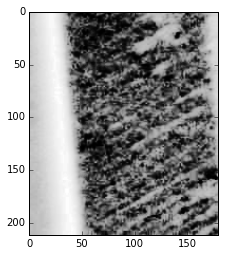

1


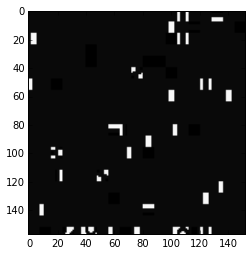

1


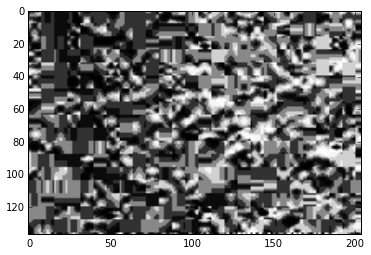

2


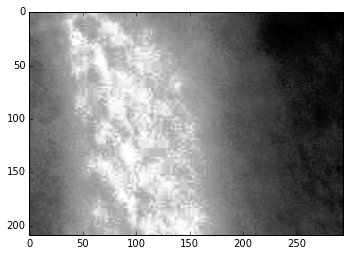

2


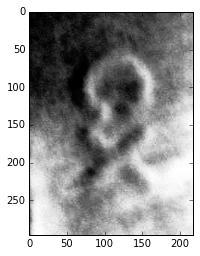

2


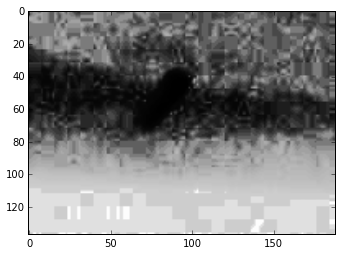

3


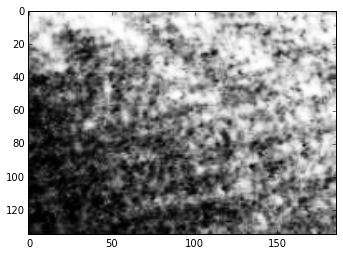

3


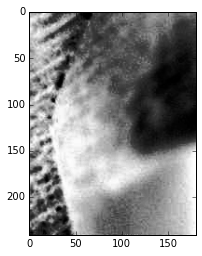

3


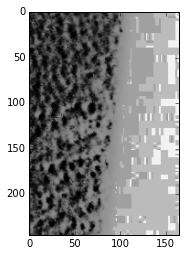

4


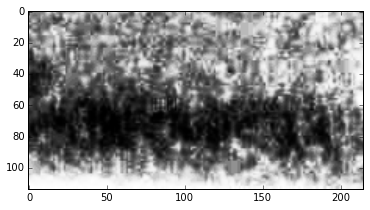

4


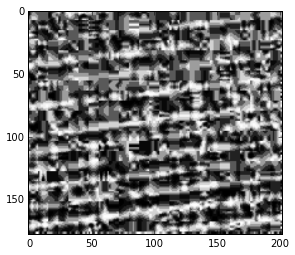

4


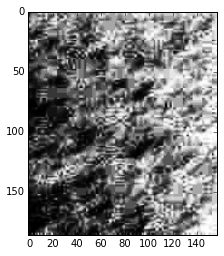

5


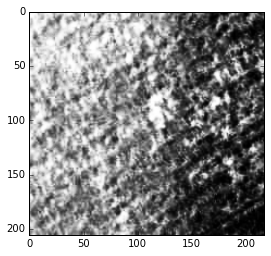

5


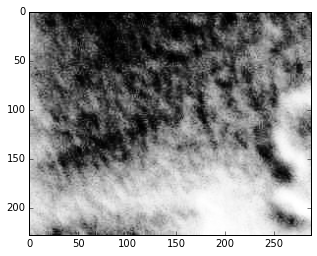

5


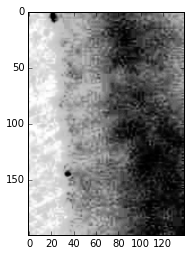

6


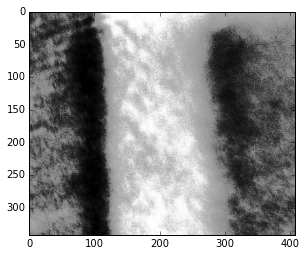

6


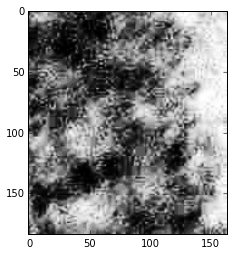

6


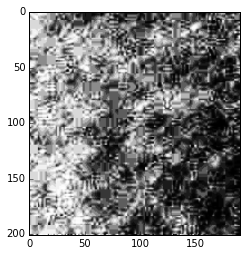

7


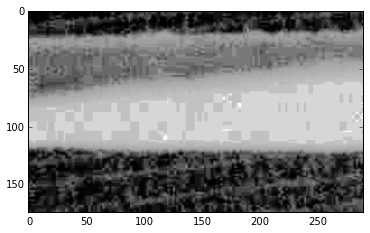

7


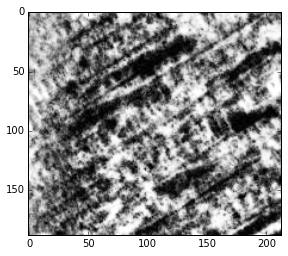

7


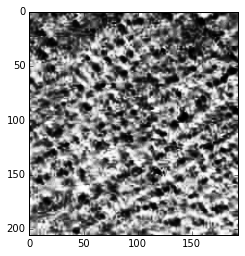

8


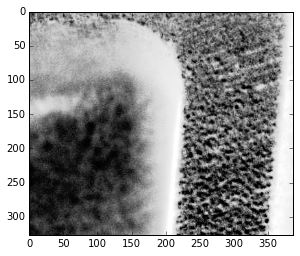

8


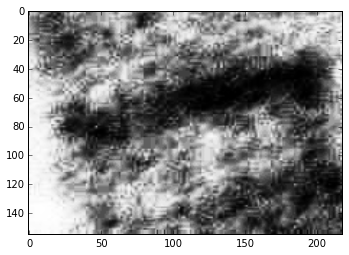

8


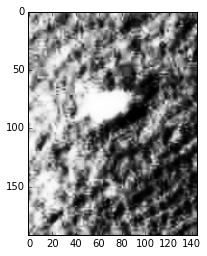

9


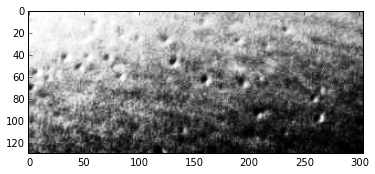

9


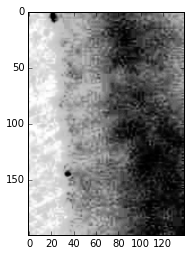

9


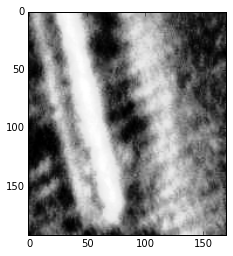

10


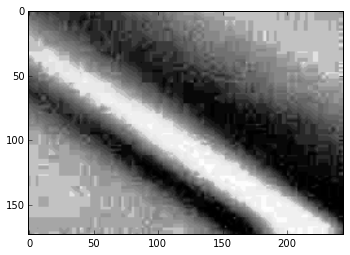

10


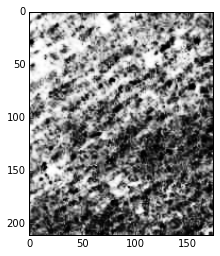

10


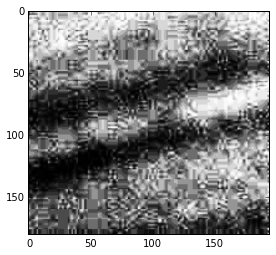

11


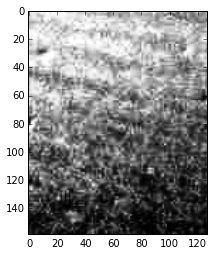

11


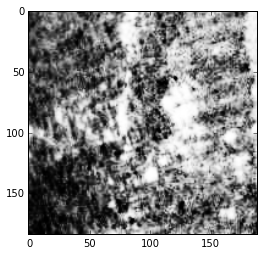

11


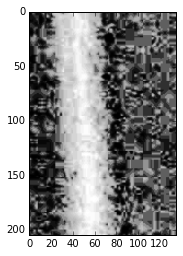

12


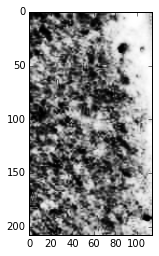

12


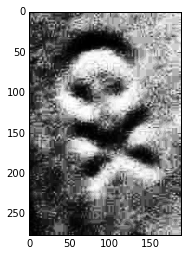

12


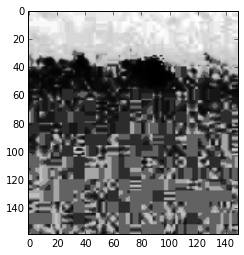

13


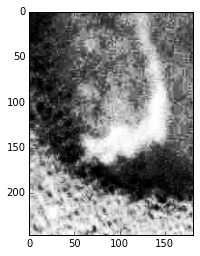

13


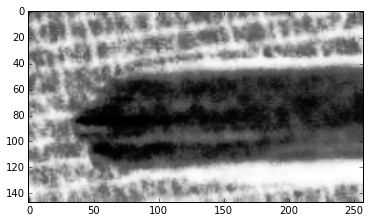

13


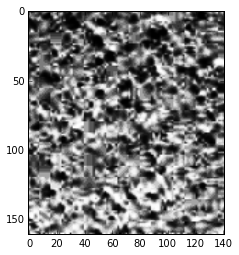

14


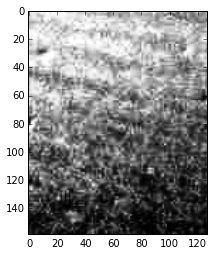

14


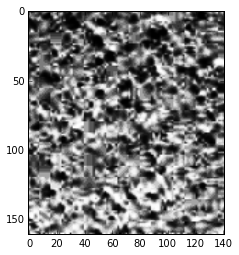

14


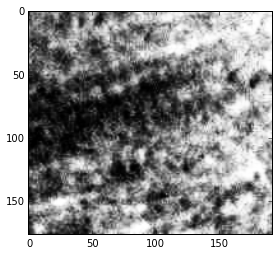

15


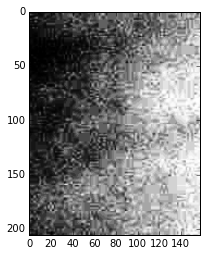

15


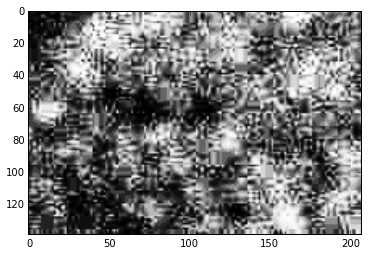

15


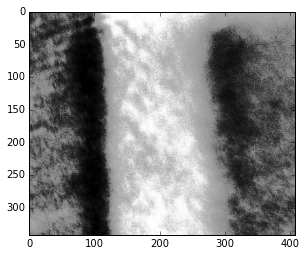

16


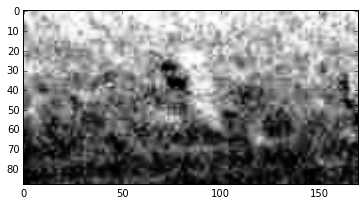

16


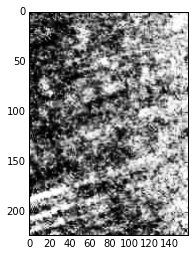

16


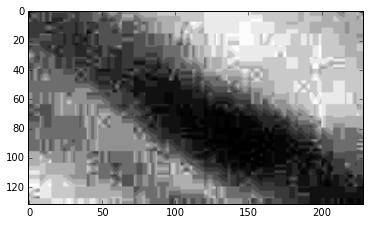

17


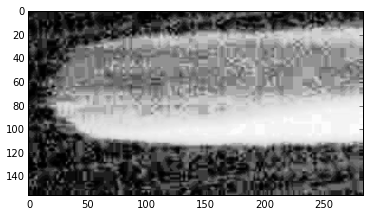

17


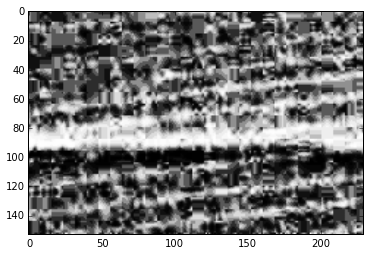

17


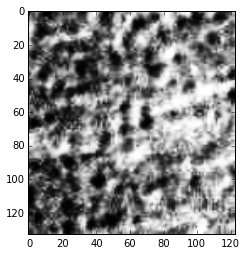

18


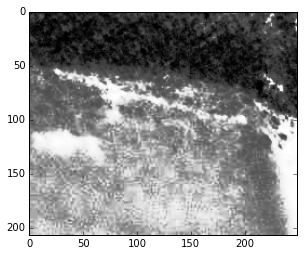

18


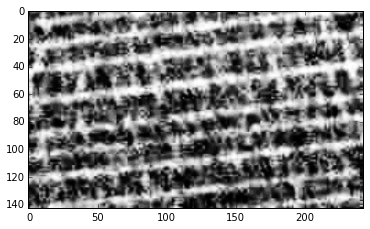

18


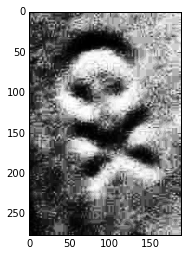

19


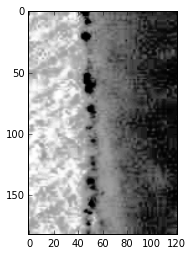

19


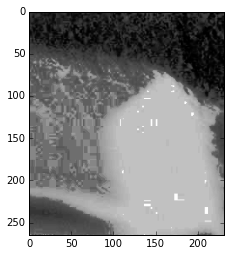

19


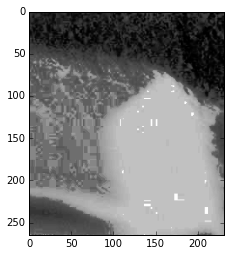

20


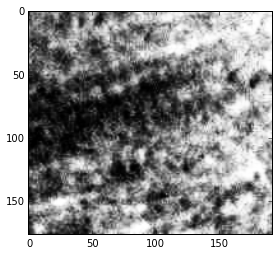

20


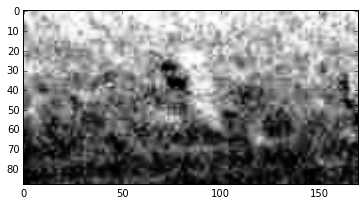

20


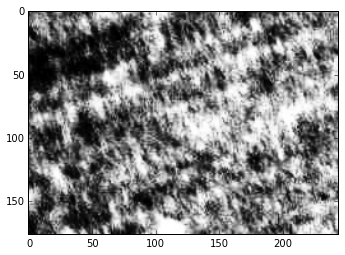

21


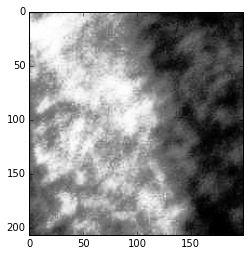

21


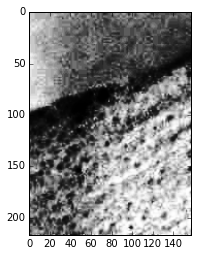

21


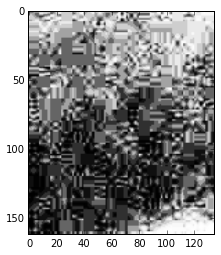

22


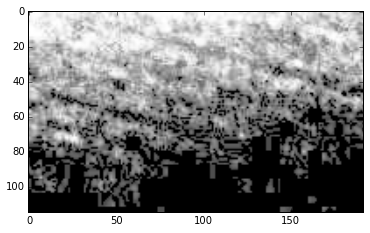

22


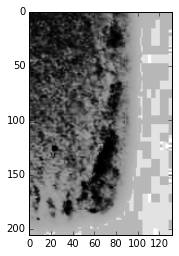

22


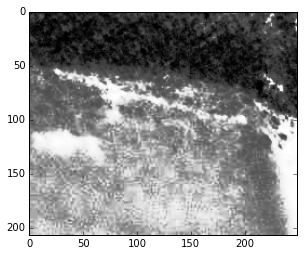

23


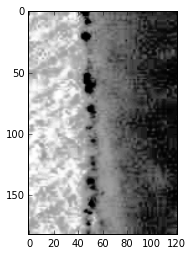

23


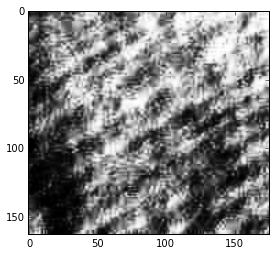

23


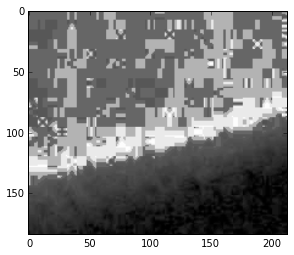

24


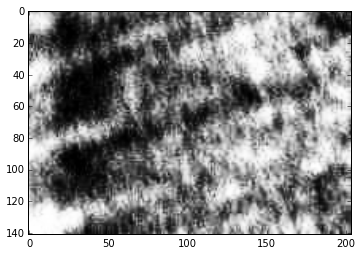

24


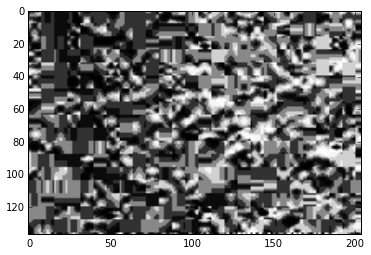

24


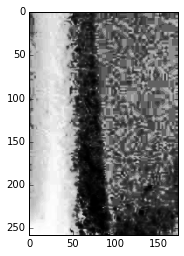

25


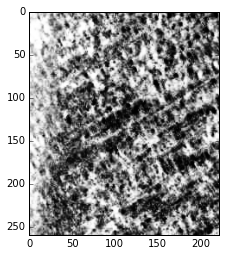

25


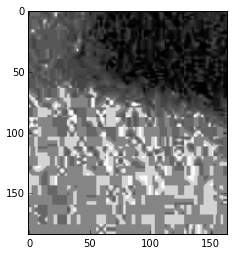

25


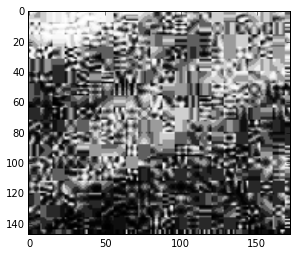

26


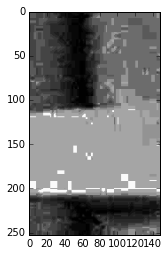

26


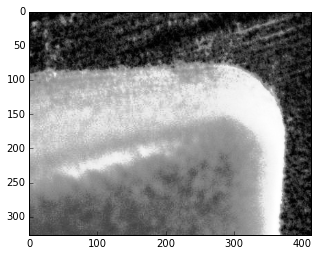

26


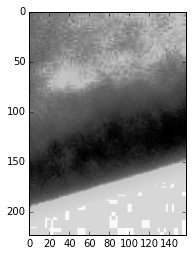

27


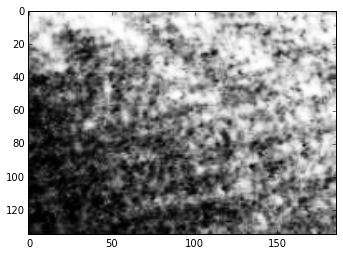

27


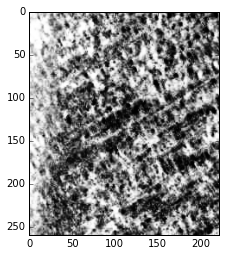

27


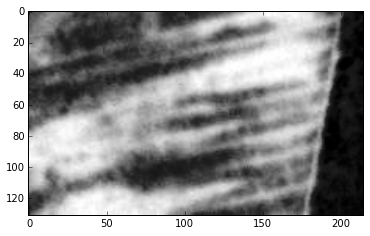

28


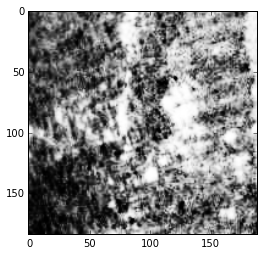

28


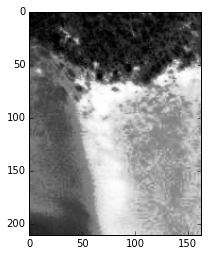

28


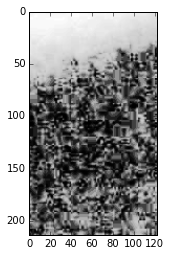

29


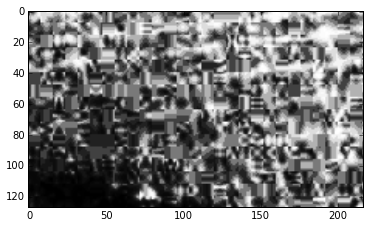

29


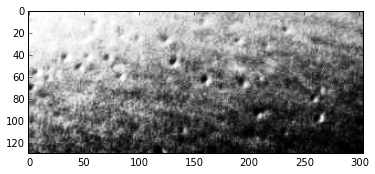

29


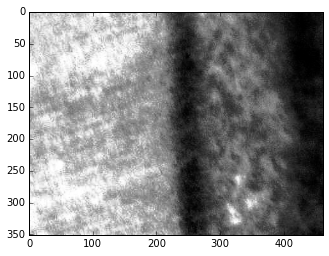

30


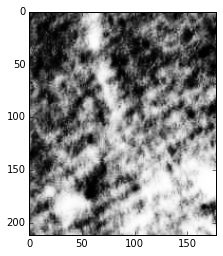

30


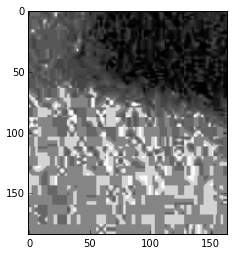

30


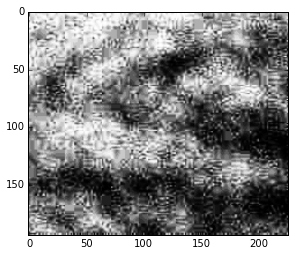

31


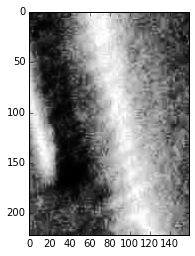

31


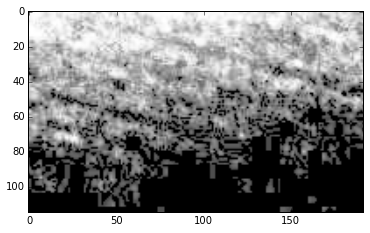

31


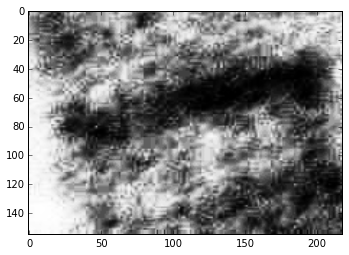

32


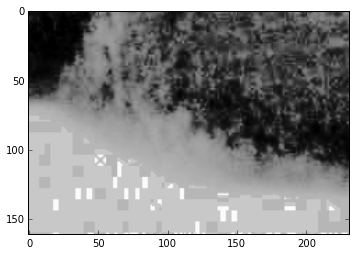

32


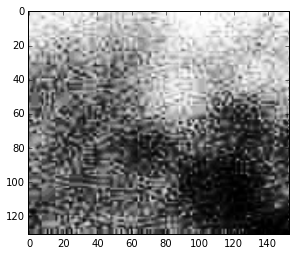

32


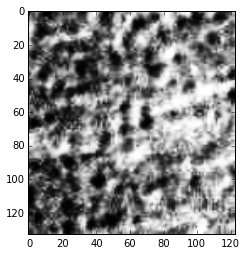

33


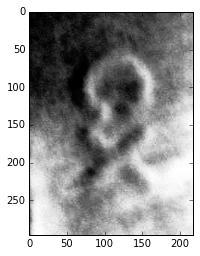

33


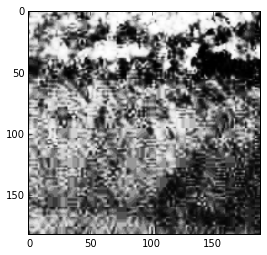

33


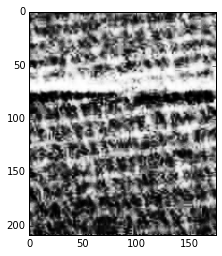

34


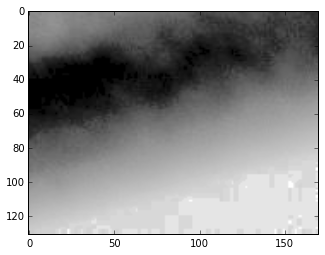

melt
shadowing
plusmetal


In [125]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
for k,d in enumerate(data):
    print(categories[k])
    size = len(d)
    if(k!=0):
        continue
        ori_row = 1
    for kk,dd in enumerate(d):
        row = int(kk/3)+1
        plt.
        plt.imshow(dd,cmap=cm.gray_r)
        plt.show()
        if(ori_row != row):
            plt.figure()


1